# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
import pandas as pd
import numpy as np
url="https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv"
df= pd.read_csv(url)


In [2]:
display(df)

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.dtypes

Customer                      object
ST                            object
GENDER                        object
Education                     object
Customer Lifetime Value       object
Income                       float64
Monthly Premium Auto         float64
Number of Open Complaints     object
Policy Type                   object
Vehicle Class                 object
Total Claim Amount           float64
dtype: object

In [4]:
#To ensure consistency and ease of use, standardize the column names of the dataframe. 
#Start by taking a first look at the dataframe and identifying any column names that need to be modified. 
#Use appropriate naming conventions and make sure that column names are descriptive and informative.
def clean_my_column_titles(df):
    df.columns=df.columns.str.replace("","").str.lower().str.strip()
    return df

clean_my_column_titles(df)
df.rename(columns= {'st': 'state'}, inplace=True)
print(df.columns)
df

Index(['customer', 'state', 'gender', 'education', 'customer lifetime value',
       'income', 'monthly premium auto', 'number of open complaints',
       'policy type', 'vehicle class', 'total claim amount'],
      dtype='object')


,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#delete all rows where every column is null

## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [6]:
#*Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
#*State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
#*In education, "Bachelors" could be replaced by "Bachelor"
#*In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*
df["gender"]=df["gender"].replace({"Femal":"F","female":"F"})
df["gender"]=df["gender"].replace({"Male":"M"})
df["state"]=df["state"].replace({"Arizona":"AZ"})
df["state"]=df["state"].replace({"Cali":"CA","California":"CA"})
df["state"]=df["state"].replace({"Washington":"WA"})
df["state"]=df["state"].replace({"Nevada":"NV"})
df["state"]=df["state"].replace({"Oregon":"OR"})
df["education"]=df["education"].replace({"Bachelors":"Bachelor"})
df["vehicle class"]=df["vehicle class"].replace({"Sports Car":"Luxury","Luxury Car":"Luxury","Luxury SUV":"Luxury"})
# % deleted from CLV below.
df

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,WA,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,AZ,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,NV,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,CA,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,WA,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
unique_gender_values = df['gender'].unique()
unique_gender_values

array([nan, 'F', 'M'], dtype=object)

In [8]:
unique_state_values = df['state'].unique()
unique_state_values

array(['WA', 'AZ', 'NV', 'CA', 'OR', nan], dtype=object)

In [9]:
unique_vehicle_class_values = df['vehicle class'].unique()
unique_vehicle_class_values

array(['Four-Door Car', 'Two-Door Car', 'SUV', 'Luxury', nan],
      dtype=object)

In [10]:
unique_education_values = df['education'].unique()
unique_education_values

array(['Master', 'Bachelor', 'High School or Below', 'College', 'Doctor',
       nan], dtype=object)

In [11]:
#*In Customer Lifetime Value, delete the `%` character*
df["customer lifetime value"] = df["customer lifetime value"].str.replace('%', '')
df["customer lifetime value"]=df["customer lifetime value"].astype(float)
df

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,WA,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,AZ,F,Bachelor,697953.59,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,NV,F,Bachelor,1288743.17,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,CA,M,Bachelor,764586.18,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,WA,M,High School or Below,536307.65,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df["customer lifetime value"] = df["customer lifetime value"]/100
df
#Dividing by 100 on the assumption that there was a conversion error resulting in unreasonably high CLV percentages...
#Result is still very high, and in any case, we don't know how to interpret this... 6979% of what?

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,WA,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,AZ,F,Bachelor,6979.5359,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,NV,F,Bachelor,12887.4317,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,CA,M,Bachelor,7645.8618,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,WA,M,High School or Below,5363.0765,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [13]:
## Customer lifetime value should be numeric
# Done in step above

In [14]:
#*Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` 
#and take the middle value. As an example, 1/5/00 should be 5. 
#Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. 
#Finally, since it should be numeric, cast the column to be in its proper type.*
unique_open_complaints_values = df['number of open complaints'].unique()
unique_open_complaints_values

array(['1/0/00', '1/2/00', '1/1/00', '1/3/00', '1/5/00', '1/4/00', nan],
      dtype=object)

In [15]:
def extract_number(string):
    if isinstance(string, str):
        parts = string.split('/')
        if len(parts) >= 2:
            return int(parts[1])
    return np.nan

df['number of open complaints'] = df['number of open complaints'].apply(extract_number)

df

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,WA,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,AZ,F,Bachelor,6979.5359,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,NV,F,Bachelor,12887.4317,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,CA,M,Bachelor,7645.8618,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,GA49547,WA,M,High School or Below,5363.0765,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
unique_open_complaints_values = df['number of open complaints'].unique()
unique_open_complaints_values

array([ 0.,  2.,  1.,  3.,  5.,  4., nan])

In [17]:
df.dtypes

customer                      object
state                         object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints    float64
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [18]:
#Counting null values per column
null_counts = df.isnull().sum()
null_counts

customer                     2937
state                        2937
gender                       3054
education                    2937
customer lifetime value      2940
income                       2937
monthly premium auto         2937
number of open complaints    2937
policy type                  2937
vehicle class                2937
total claim amount           2937
dtype: int64

In [19]:
#removing all rows with null values throughout
df=df.dropna(how='all')
df

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,WA,NaN,Master,NaN,0.0,1000.0,0.0,Personal Auto,Four-Door Car,2.704934
1,QZ44356,AZ,F,Bachelor,6979.5359,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,NV,F,Bachelor,12887.4317,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
3,WW63253,CA,M,Bachelor,7645.8618,0.0,106.0,0.0,Corporate Auto,SUV,529.881344
4,GA49547,WA,M,High School or Below,5363.0765,36357.0,68.0,0.0,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
1066,TM65736,OR,M,Master,3059.5503,38644.0,78.0,1.0,Personal Auto,Four-Door Car,361.455219
1067,VJ51327,CA,F,High School or Below,20314.9976,63209.0,102.0,2.0,Personal Auto,SUV,207.320041
1068,GS98873,AZ,F,Bachelor,3239.1247,16061.0,88.0,0.0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,CA,F,Master,4626.8011,79487.0,114.0,0.0,Special Auto,SUV,547.200000


In [20]:
#Counting null values per column after dropping rows with 100% NaN values
null_counts = df.isnull().sum()
null_counts
#Now we see that the only columns with null values are gender and customer lifetime value

customer                       0
state                          0
gender                       117
education                      0
customer lifetime value        3
income                         0
monthly premium auto           0
number of open complaints      0
policy type                    0
vehicle class                  0
total claim amount             0
dtype: int64

In [34]:
#Changing gender to "not available"
#Using the mean to fill null values int he customer lifetime value column
df.loc[:, 'gender'] = df['gender'].fillna("not available")

In [31]:
#checking summary stats for customer lifetime vaue
print(df["customer lifetime value"].describe())
print(df["customer lifetime value"].mode())
print(df["customer lifetime value"].median())
#We will not use the mean to fill null values as the mean is being skewed by a few very large values.
#Asking chatgpt about how to choose between using the median or the bimodal value:
#Median: The median is the middle value of a sorted dataset. 
#It's not influenced by extreme values (outliers) as much as the mean is, 
#making it a robust measure of central tendency in skewed distributions. 
#In your case, the median of the "customer lifetime value" column is approximately 5881.74235.
#Bimodal Average: If your dataset has two modes (two values that occur most frequently), 
#you can compute the average of these two mode values as the bimodal average. 
#This method is appropriate when you have two distinct peaks in your data.

count     1068.000000
mean      7936.902593
std       6434.784103
min       2004.350700
25%       4034.079950
50%       5881.742350
75%       8962.871975
max      58166.553500
Name: customer lifetime value, dtype: float64
0    2514.5920
1    4458.1134
Name: customer lifetime value, dtype: float64
5881.74235


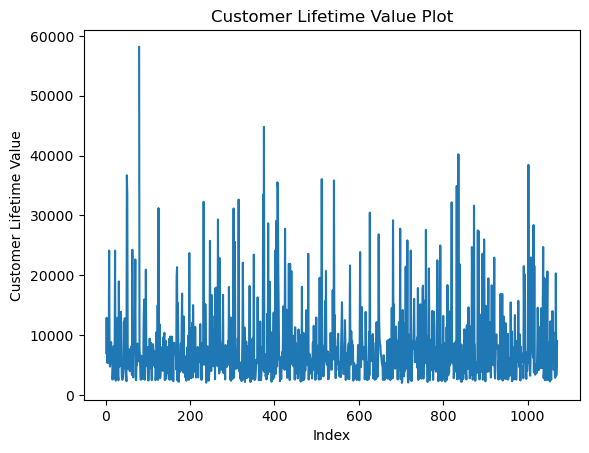

In [29]:
#Checking if there are two distinct peaks in the data. There are not... 
import matplotlib.pyplot as plt 
plt.plot(df["customer lifetime value"])
plt.xlabel("Index")
plt.ylabel("Customer Lifetime Value")
plt.title("Customer Lifetime Value Plot")
plt.show()

In [33]:
#Using the mean to fill null values int he customer lifetime value column
clv_median = df['customer lifetime value'].median()
df.loc[:, 'customer lifetime value'] = df['customer lifetime value'].fillna(clv_median)


In [35]:
#Counting null values per column again
null_counts = df.isnull().sum()
null_counts

customer                     0
state                        0
gender                       0
education                    0
customer lifetime value      0
income                       0
monthly premium auto         0
number of open complaints    0
policy type                  0
vehicle class                0
total claim amount           0
dtype: int64

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [41]:
#Checking if there are any duplicated customers. 
num_duplicates = df.duplicated(subset=["customer"]).sum()
print("Number of duplicates in 'customer' column:", num_duplicates)
#There are no duplicated customers. This would be the only duplicate I would want to drop; 
#so I will not be dropping any duplicates.

Number of duplicates in 'customer' column: 0


In [52]:
# Export DataFrame to CSV
df.to_csv('insurance_df.csv', index=False)

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [24]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [53]:
# Reviewing stats for total claim ammount               
top_quartile_value = df['total claim amount'].quantile(0.75)
total_claim_top_25_df = df[df['total claim amount'] >= top_quartile_value]
display(total_claim_top_25_df)
total_claim_top_25_df.describe()
total_claim_top_25_df.describe(include="object")
total_claim_top_25_df.describe()
#There are 273 policies with a claim amount greater than the 75th percentile. 
#On average these customers pay $163/month, earn an income of $24,107/year and have a CLV of 9,184%.
#The majority of policies in this group are in Oregon, are women, have a high school education (or lower), 
#are for an SUV, and are for personal insurance.

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
1,QZ44356,AZ,F,Bachelor,6979.5359,0.0,94.0,0.0,Personal Auto,Four-Door Car,1131.464935
2,AI49188,NV,F,Bachelor,12887.4317,48767.0,108.0,0.0,Personal Auto,Two-Door Car,566.472247
17,OE15005,CA,not available,College,3945.2416,28855.0,101.0,0.0,Personal Auto,SUV,647.442031
23,TZ98966,NV,not available,Bachelor,2450.1910,0.0,73.0,3.0,Corporate Auto,Four-Door Car,554.376763
26,US89481,CA,not available,Bachelor,3946.3721,0.0,111.0,0.0,Personal Auto,Four-Door Car,799.200000
...,...,...,...,...,...,...,...,...,...,...,...
1059,YG44474,OR,M,College,14014.7213,54193.0,117.0,0.0,Corporate Auto,SUV,720.752945
1061,RY92647,CA,F,Bachelor,10506.7717,0.0,92.0,0.0,Personal Auto,Four-Door Car,546.524896
1068,GS98873,AZ,F,Bachelor,3239.1247,16061.0,88.0,0.0,Personal Auto,Four-Door Car,633.600000
1069,CW49887,CA,F,Master,4626.8011,79487.0,114.0,0.0,Special Auto,SUV,547.200000


,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
count,273.000000,273.000000,273.000000,273.000000,273.000000
mean,9183.794161,24106.545788,163.000000,0.424908,774.005353
std,6582.581975,27542.717560,613.645376,0.960068,291.304731
min,2287.596900,0.000000,63.000000,0.000000,532.800000
25%,4747.734600,0.000000,99.000000,0.000000,595.200000
50%,7859.414600,18846.000000,113.000000,0.000000,673.342650
75%,10656.882000,44897.000000,133.000000,0.000000,844.481918
max,40224.013600,99316.000000,10202.000000,5.000000,2893.239678


In [45]:
# Reviewing stats for CLV
df["customer lifetime value"].describe() 

count     1071.000000
mean      7931.145842
std       6426.675855
min       2004.350700
25%       4048.534600
50%       5881.742350
75%       8945.209950
max      58166.553500
Name: customer lifetime value, dtype: float64

In [54]:
# Identifying policies with low CLV    
bottom_quartile_value = df['customer lifetime value'].quantile(0.25)
total_claim_bottom_25_df = df[df['customer lifetime value'] <= bottom_quartile_value]
display(total_claim_bottom_25_df)
total_claim_bottom_25_df.describe()
total_claim_bottom_25_df.describe(include="object")

,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
16,FV94802,NV,not available,High School or Below,2566.8678,25049.0,67.0,0.0,Personal Auto,Two-Door Car,454.245098
17,OE15005,CA,not available,College,3945.2416,28855.0,101.0,0.0,Personal Auto,SUV,647.442031
20,ZK25313,OR,not available,High School or Below,2872.0513,57749.0,74.0,0.0,Personal Auto,Two-Door Car,355.200000
23,TZ98966,NV,not available,Bachelor,2450.1910,0.0,73.0,3.0,Corporate Auto,Four-Door Car,554.376763
24,HM55802,CA,not available,Bachelor,2392.1079,17870.0,61.0,0.0,Corporate Auto,Four-Door Car,439.200000
...,...,...,...,...,...,...,...,...,...,...,...
1053,NT43594,NV,F,Bachelor,2248.4496,24910.0,63.0,1.0,Personal Auto,Four-Door Car,347.857619
1056,PI47776,OR,F,Bachelor,2530.7051,89451.0,63.0,0.0,Corporate Auto,Four-Door Car,61.769564
1065,XD85577,CA,M,Bachelor,2842.2669,69417.0,73.0,1.0,Personal Auto,Four-Door Car,30.874869
1066,TM65736,OR,M,Master,3059.5503,38644.0,78.0,1.0,Personal Auto,Four-Door Car,361.455219


,customer,state,gender,education,policy type,vehicle class
count,268,268,268,268,268,268
unique,268,5,3,5,3,4
top,FV94802,CA,M,Bachelor,Personal Auto,Four-Door Car
freq,1,92,120,85,187,184


In [51]:
#Subsetting the group of policies with high total claims and low CLV
risky_cust_df = df[(df['total claim amount'] >= top_quartile_value) & (df['customer lifetime value'] <= bottom_quartile_value)]
display(risky_cust_df.head())
print(risky_cust_df.describe())
print(risky_cust_df.describe(include="object"))
#There are 41 policies which fall into the category of risky customers as we've defined it. 
#On average these customers pay $93/month, earn an income of $16,132/year and have a CLV of 3,400%.
#The majority of policies in this group are in California, are women, have a bachelor degree, 
#are for a four door car, and are for personal insurance.


,customer,state,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
17,OE15005,CA,not available,College,3945.2416,28855.0,101.0,0.0,Personal Auto,SUV,647.442031
23,TZ98966,NV,not available,Bachelor,2450.1910,0.0,73.0,3.0,Corporate Auto,Four-Door Car,554.376763
26,US89481,CA,not available,Bachelor,3946.3721,0.0,111.0,0.0,Personal Auto,Four-Door Car,799.200000
38,CM61827,OR,not available,Bachelor,3090.0341,0.0,90.0,0.0,Personal Auto,Two-Door Car,648.000000
42,IL19217,CA,not available,Bachelor,3939.0064,60021.0,99.0,0.0,Personal Auto,Four-Door Car,882.871945


       customer lifetime value        income  monthly premium auto  \
count                41.000000     41.000000             41.000000   
mean               3400.562695  16132.097561             93.024390   
std                 570.436991  23708.735202             16.142317   
min                2287.596900      0.000000             63.000000   
25%                2898.732700      0.000000             80.000000   
50%                3652.532400      0.000000             97.000000   
75%                3873.647000  28142.000000            105.000000   
max                4023.814400  92600.000000            117.000000   

       number of open complaints  total claim amount  
count                  41.000000           41.000000  
mean                    0.536585          719.118612  
std                     1.206183          150.389974  
min                     0.000000          532.800000  
25%                     0.000000          632.715382  
50%                     0.000000       